<a href="https://colab.research.google.com/github/bharat787/ForestDeptProj/blob/master/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all Keras libraries 
All libraries related to image processing, numpy, cv2 to be imported.


In [0]:
import numpy as np
import random
import cv2
import os
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from sklearn.model_selection import train_test_split
# from keras.optimizers import Adam
from matplotlib.pyplot import imshow
#cd %matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.


# Importing image dataset
All image datasets were imported directly from folders stored in google drive.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Since colab doesn't support cv2.imshow we import a patch workaround
cv2_imshow replaces all cv2.imshow calls.

In [0]:
from google.colab.patches import cv2_imshow

# Load data and Preprocess
Find the path to your folder using the files menu on the right(if using colab)
or use the path in your local system
Preprocessing includes resizing to input size(here, 64x64), converting to numpy array, labelling the images, shuffling the whole dataset.

In [0]:
# code to preprocess and load data

# initialize the data and labels list
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = '/content/drive/My Drive/forestdata/dataset/Mngroves' # address path
for filename in os.listdir(imagePaths):
    if filename.endswith("jpg"):                                   # change if other format
        # Your code comes here such as 
        fname = ('/content/drive/My Drive/forestdata/dataset/Mngroves/' + str(filename)) # total path by joining path + filename
        image = cv2.imread(fname)
        #cv2_imshow(image)
        image = cv2.resize(image, (64, 64))  # 64 x 64 is input to resnet
        image = img_to_array(image)
        data.append(image)
       
        # get the labels
        label = fname.split(os.path.sep)[-2]
        label = 1 if label == "Mngroves" else 0
        labels.append(label)
print('all done')   


[INFO] loading images...


'\nprint ("number of training examples = " + str(X_train.shape[0]))\nprint ("number of test examples = " + str(X_test.shape[0]))\nprint ("X_train shape: " + str(X_train.shape))\nprint ("Y_train shape: " + str(Y_train.shape))\nprint ("X_test shape: " + str(X_test.shape))\nprint ("Y_test shape: " + str(Y_test.shape))\n\nmodel.fit(X_train, Y_train, epochs = 2, batch_size = 32)\n'

In [0]:
name = '/content/drive/My Drive/forestdata/dataset/Mngroves/' + 'Mngroves0.jpg'
image = cv2.imread(name)
cv2_imshow(image)

NameError: ignored

Loading the second class of images.


In [0]:
imagePaths = '/content/drive/My Drive/forestdata/dataset/NtMngroves'
for filename in os.listdir(imagePaths):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        fname = ('/content/drive/My Drive/forestdata/dataset/NtMngroves/' + str(filename))
        print(fname)
        
        image = cv2.imread(fname)
        #cv2_imshow(image)
        image = cv2.resize(image, (64, 64))  # 64 x 64 is input to resnet
        image = img_to_array(image)
        data.append(image)
       
        # get the labels
        label = fname.split(os.path.sep)[-2]
        label = 1 if label == "Mngroves" else 0
        labels.append(label)
Print('all done')

/content/drive/My Drive/forestdata/dataset/NtMngroves/0.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/1.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/2.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/3.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/4.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/5.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/6.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/7.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/8.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/9.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/10.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/11.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/12.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/13.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/14.jpg
/content/drive/My Drive/forestdata/dataset/NtMngroves/15.jpg
/content/drive/My Drive/forestdata

# Shuffling data
Done so as to prevent classifer to tune to one class over the other
also both data and labels are shuffled in unison so that corresponding image and label remain the same.

In [0]:
rng_state = np.random.get_state()     # random state is kept the same so that
np.random.shuffle(data)               # both get same order whilst shuffling
np.random.set_state(rng_state)
np.random.shuffle(labels)

In [0]:
print(labels) # checking if shuffling done properly

[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 

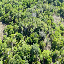

In [0]:
cv2_imshow(data[1]) # change the indice to manually confirm shuffle

# Split Data and Create test and train sets
We will keep a proportion of images as trainset (here 75%) as train set rest as test set(25%).
The random state helps to keep the test and train split always same to help debug while training the model.

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)  # classification of 2 only
testY = to_categorical(testY, num_classes=2)    # into magroves or not mangroves


'\n## TODO comment this line\n#X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()\n'

In [0]:
print(data)

[[[[0.36078431 0.54117647 0.55294118]
   [0.40784314 0.63137255 0.63529412]
   [0.37647059 0.65098039 0.67843137]
   ...
   [0.37254902 0.54117647 0.51764706]
   [0.34901961 0.54901961 0.52156863]
   [0.35686275 0.56862745 0.57647059]]

  [[0.35294118 0.58431373 0.60784314]
   [0.30196078 0.55686275 0.57647059]
   [0.34117647 0.59607843 0.62745098]
   ...
   [0.43921569 0.60784314 0.6       ]
   [0.32156863 0.42352941 0.40784314]
   [0.30980392 0.49803922 0.49411765]]

  [[0.34509804 0.62352941 0.63921569]
   [0.3254902  0.62745098 0.63921569]
   [0.38431373 0.63921569 0.67058824]
   ...
   [0.43529412 0.55686275 0.52156863]
   [0.3254902  0.46666667 0.44313725]
   [0.32941176 0.51764706 0.51372549]]

  ...

  [[0.1372549  0.30588235 0.3372549 ]
   [0.12941176 0.2745098  0.30980392]
   [0.17254902 0.37254902 0.45098039]
   ...
   [0.06666667 0.2627451  0.2745098 ]
   [0.         0.21960784 0.25882353]
   [0.75294118 0.88235294 0.9254902 ]]

  [[0.14509804 0.2627451  0.29019608]
   [0.1

In [0]:
print(labels)

[1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0 1 1 0 1 1 1 0 1 0 